In [9]:

import pandas as pd
import re
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import numpy as np



In [10]:
df = pd.read_csv('/Users/poojithareddy/Library/Containers/com.microsoft.Excel/Data/Downloads/alldata.csv')
df.head()

,position,company,description,reviews,location
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,"Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",NaN,"Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA"


In [11]:
df.describe()

,reviews
count,5326.000000
mean,3179.089185
std,8448.515056
min,2.000000
25%,27.000000
50%,230.000000
75%,1578.000000
max,148114.000000


In [13]:
df.isnull().sum()


position         11
company          11
description      11
reviews        1638
location         11
dtype: int64

In [14]:
df.drop(index = df[df['position'].isnull()].index, inplace = True)
df.isnull().any()


position       False
company        False
description    False
reviews         True
location       False
dtype: bool

In [15]:
df['location'] = df.location.apply(lambda x: re.sub('\d*','',str(x)))
df['city'] = df.location.apply(lambda x: x.split(',')[0].strip())
df['state'] = df.location.apply(lambda x: x.split(',')[1].strip())
df['location'] = df['city']+ ', ' + df['state']
df.head()

,position,company,description,reviews,location,city,state
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,"Atlanta, GA",Atlanta,GA
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,"Atlanta, GA",Atlanta,GA
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",NaN,"Atlanta, GA",Atlanta,GA
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA",Atlanta,GA
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA",Atlanta,GA


In [16]:

# Group position name into 5 types
data = df.copy()
data['position']=[x.upper() for x in data['position']]
data.loc[data.position.str.contains("SCIENTIST"), 'position'] = 'Data Scientist'

data.loc[data.position.str.contains('ENGINEER'),'position']='Machine Learning Engineer'
data.loc[data.position.str.contains('PRINCIPAL STATISTICAL PROGRAMMER'),'position']='Machine Learning Engineer'
data.loc[data.position.str.contains('PROGRAMMER'),'position']='Machine Learning Engineer'
data.loc[data.position.str.contains('DEVELOPER'),'position']='Machine Learning Engineer'

data.loc[data.position.str.contains('ANALYST'), 'position'] = 'Data Analyst'
data.loc[data.position.str.contains('STATISTICIAN'), 'position'] = 'Data Analyst'

data.loc[data.position.str.contains('MANAGER'),'position']='Data Science Manager'
data.loc[data.position.str.contains('CONSULTANT'),'position']='Data Science Manager'
data.loc[data.position.str.contains('DATA SCIENCE'),'position']='Data Science Manager'
data.loc[data.position.str.contains('DIRECTOR'),'position']='Data Science Manager'

data.position=data[(data.position == 'Data Scientist') | (data.position == 'Data Analyst') | (data.position == 'Machine Learning Engineer') | (data.position == 'Data Science Manager')]
data.position=['Others' if x is np.nan else x for x in data.position]


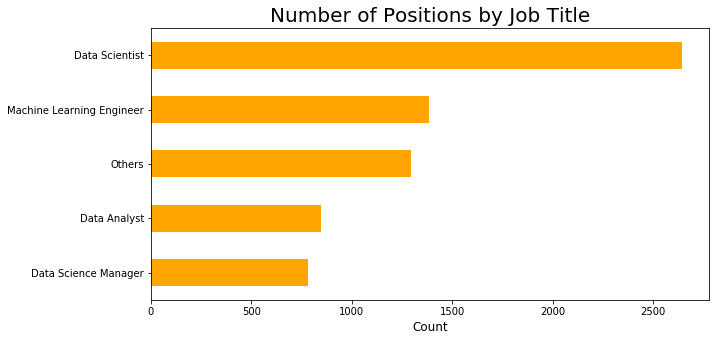

In [44]:
title = data.groupby(['position']).count().sort_values('company')

title['company'].plot(kind='barh',figsize = (10,5),color = c)
c=['orange']
plt.xlabel('Count', size = 12)
plt.ylabel('')
plt.yticks(size = 10)
plt.xticks(size = 10)
plt.title('Number of Positions by Job Title', size = 20)
plt.show()

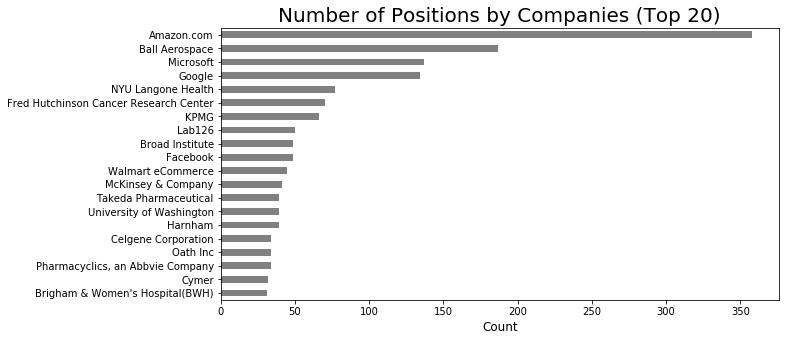

In [42]:
company = df.groupby(['company']).count().sort_values('position').tail(20)

company['position'].plot(kind='barh',figsize = (10,5), color = c)
c= ['grey']
plt.xlabel('Count', size = 12)
plt.ylabel('')
plt.yticks(size = 10)
plt.xticks(size = 10)
plt.title('Number of Positions by Companies (Top 20)', size = 20)
plt.show()

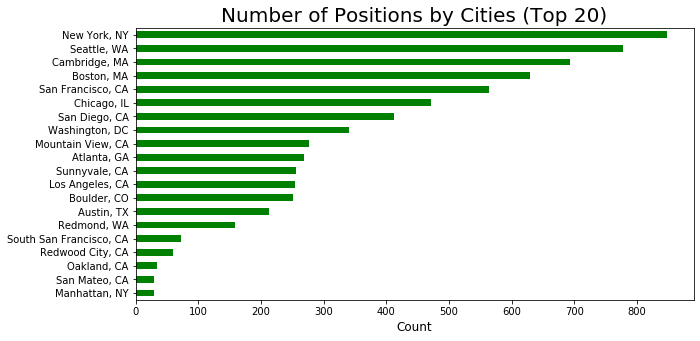

In [38]:
city = df.groupby(['location']).count().sort_values('position').tail(20)
c= ['green']

city['position'].plot(kind='barh',figsize = (10,5),color=c)
plt.xlabel('Count', size = 12)
plt.ylabel('')
plt.yticks(size = 10)
plt.xticks(size = 10)
plt.title('Number of Positions by Cities (Top 20)', size = 20)
plt.show()

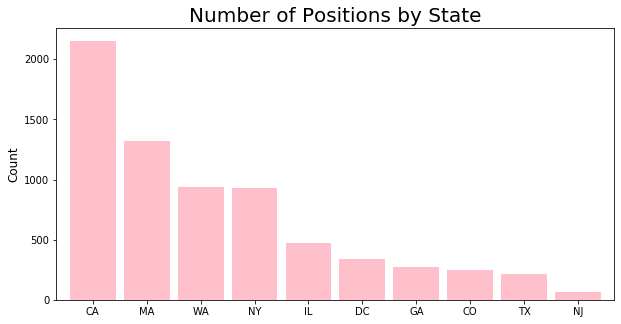

In [52]:
state = df.groupby('state').count().sort_values('position',ascending = False)

state['position'].plot(kind = 'bar',figsize = (10,5) ,width = 0.85, color= c)
c= ['pink']
plt.xlabel('')
plt.ylabel('Count',size = 12)
plt.title('Number of Positions by State', size = 20)
plt.yticks(size = 10)
plt.xticks(size = 10, rotation = 720)
plt.show()